<a href="https://colab.research.google.com/github/dhoangquan1/LinearAlgebraProject/blob/main/src/image_transform_pil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Goal__ Implement linear transformation on image

In [3]:
import math
import numpy as np
from PIL import Image

In [4]:
ls

image0.png  sample_data/


----
0. Preprocessing Image

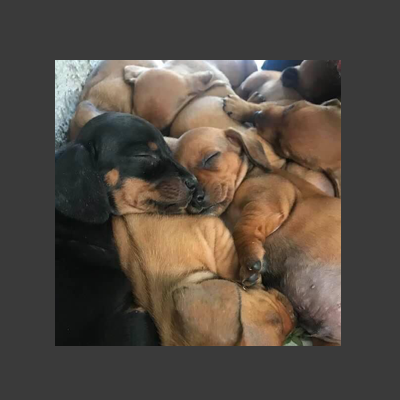

In [5]:
# Define the image file path
image_path = "image0.png"
# Load the image
image0 = Image.open(image_path)
image0

In [11]:
def image_tranform(image_np, linear_transform):
  # Get the dimensions of the image
  height, width, channels = image_np.shape

  # Define the center
  center_x = width / 2
  center_y = height / 2

  # Loop through each pixel in the image and apply the transformation
  transformed_image = np.zeros_like(image_np)

  for y in range(height):
      for x in range(width):
          # Translate the pixel to the origin
          translated_x = x - center_x
          translated_y = -(y - center_y)

          # Apply the transformation: matrix vector multiplication
          transformed_x, transformed_y = linear_transform@np.array([translated_x, translated_y])

          # Translate the pixel back to its original position
          transformed_x += center_x
          transformed_y = - transformed_y + center_y

          # Round the pixel coordinates to integers
          transformed_x = int(round(transformed_x))
          transformed_y = int(round(transformed_y))

          # Copy the pixel to the transformed image
          if (transformed_x >= 0 and transformed_x < width and
              transformed_y >= 0 and transformed_y < height):
              transformed_image[transformed_y, transformed_x] = image_np[y, x]

  return transformed_image

In [15]:
# Convert the image as a numpy array
image0_np = np.array(image0)
print(f'The dimension of the image_np is {image0_np.shape}')

The dimension of the image_np is (400, 400, 4)


---
1. Transformation T1: scales the image0 to half its size

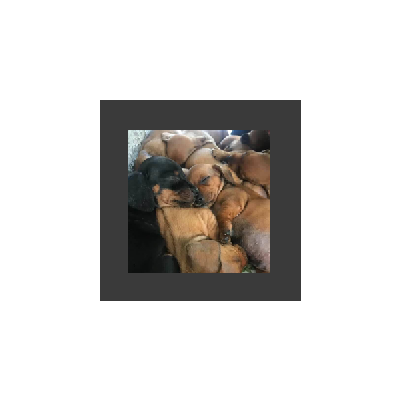

In [31]:
# Define the standard matrix
mat1 = np.array([
    [.5, 0],
    [0, .5]
])
# apply transform
image1_np = image_tranform(image0_np, mat1)
# convert a numpy array to image
image1 = Image.fromarray(image1_np)
image1

---
2. Transformation T2: Reflects image1 through y = 2x

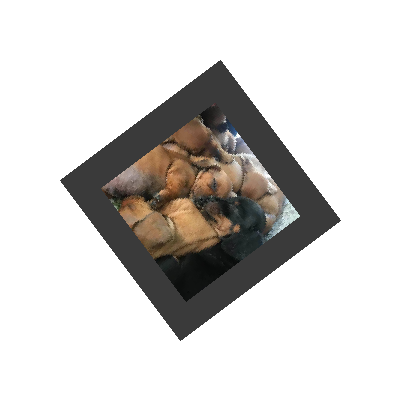

In [32]:
# Define the standard matrix
mat2 = np.array([
    [-3/5, 4/5],
    [4/5, 3/5]
])
# apply transform
image2_np = image_tranform(image1_np, mat2)
# convert a numpy array to image
image2 = Image.fromarray(image2_np)
image2

---
3. Transformation T3: reflects image2 through y=-1/2 x

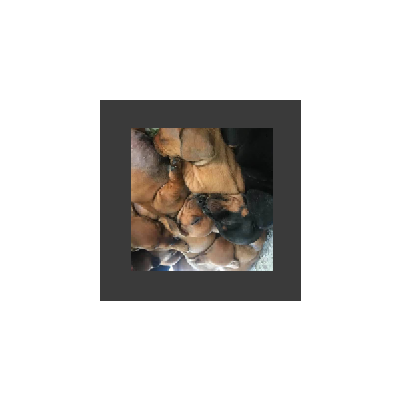

In [38]:
# Define the standard matrix
mat3 = np.array([
    [3/5, -4/5],
    [-4/5, -3/5]
])
# apply transform
image3_np = image_tranform(image2_np, mat3)
# convert a numpy array to image
image3 = Image.fromarray(image3_np)
image3

---
4. Transformation T: applies image1 to composition T2 ∘ T1

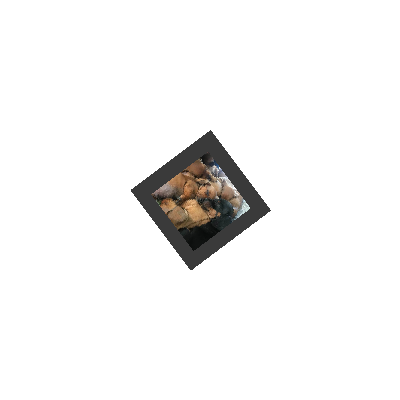

In [36]:
# Define the standard matrix
matT = np.array([
    [-3/10, 4/10],
    [4/10, 3/10]
])
# apply transform
image1_np = image_tranform(image1_np, matT)
# convert a numpy array to image
image1 = Image.fromarray(image1_np)
image1

---
5. Transformation T<sup>-1</sup>: applies image3 to inverse transformation of T

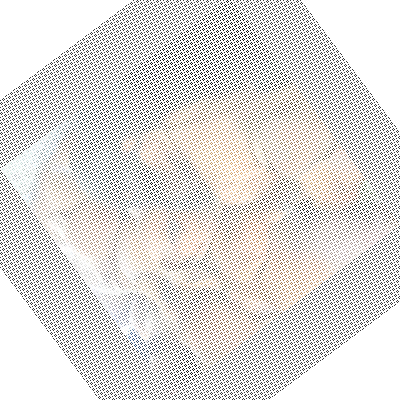

In [39]:
# Define the standard matrix
matTinv = np.array([
    [-6/5, 8/5],
    [8/5, 6/5]
])
# apply transform
image3_np = image_tranform(image3_np, matTinv)
# convert a numpy array to image
image3 = Image.fromarray(image3_np)
image3

---
6. Favorite transformation: Horizontal shear

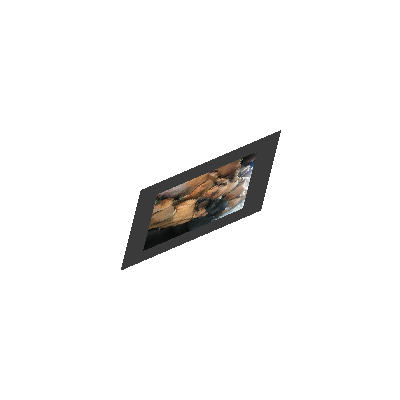

In [41]:
# Define the standard matrix
matF = np.array([
    [1, 1],
    [0, 1]
])
# apply transform
image4_np = image_tranform(image1_np, matF)
# convert a numpy array to image
image4 = Image.fromarray(image4_np)
image4